<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [161]:
import pandas as pd
import psycopg2

In [162]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [163]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies).

In [4]:
# текст запроса
query_3_1 = f'''
      SELECT COUNT(*)
      FROM VACANCIES
'''

In [5]:
df = pd.read_sql_query(query_3_1, connection)
df

<ipython-input-5-2e12baac1c84>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers).

In [6]:
query_3_2 = f'''
      SELECT COUNT(*)
      FROM EMPLOYERS
'''

In [7]:
df = pd.read_sql_query(query_3_2, connection)
df

<ipython-input-7-73a9d6450d46>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_2, connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
query_3_3 = f'''
      SELECT COUNT(*)
      FROM AREAS
'''

In [9]:
df = pd.read_sql_query(query_3_3, connection)
df

<ipython-input-9-0e918ca7d0bf>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3, connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
query_3_4 = f'''
      SELECT COUNT(*)
      FROM INDUSTRIES
'''

In [11]:
df = pd.read_sql_query(query_3_4, connection)
df

<ipython-input-11-e38904239d61>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_4, connection)


,count
0,294


***

Можно увидеть, что в БД у нас довольно много вакансий и работадателей. Но довольно много городов (что странно). Так как сейчас их вот столько:

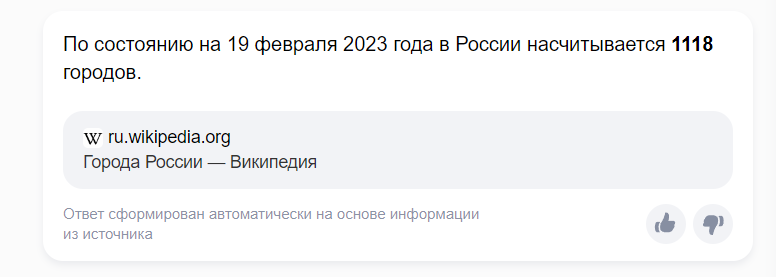

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
query_3_5 = f'''
SELECT AREAS.name, COUNT(VACANCIES.id) AS cnt
FROM AREAS
LEFT JOIN VACANCIES ON AREAS.id = VACANCIES.area_id
GROUP BY AREAS.name
ORDER BY cnt DESC
LIMIT 5
'''

In [13]:
df = pd.read_sql_query(query_3_5, connection)
df

<ipython-input-13-aea52bff34b4>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_5, connection)


,name,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [14]:
query_3_6 = f'''
SELECT COUNT(*)
FROM VACANCIES
WHERE (VACANCIES.salary_from IS NOT NULL) OR (VACANCIES.salary_to IS NOT NULL)
'''

In [15]:
df = pd.read_sql_query(query_3_6, connection)
df

<ipython-input-15-0078c22e1bd7>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_6, connection)


,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [16]:
query_3_7 = f'''
SELECT ROUND(AVG(VACANCIES.salary_from)) AS salary_from, ROUND(AVG(VACANCIES.salary_to)) as salary_to
FROM VACANCIES
'''

In [17]:
df = pd.read_sql_query(query_3_7, connection)
df

<ipython-input-17-772589a787f5>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_7, connection)


,salary_from,salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [18]:
query_3_8 = f'''
SELECT schedule, employment, COUNT(*) AS vacancy_count
FROM VACANCIES
GROUP BY schedule, employment
ORDER BY vacancy_count DESC
OFFSET 1 LIMIT 1;
'''

In [19]:
df = pd.read_sql_query(query_3_8, connection)
df

<ipython-input-19-b16863679553>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_8, connection)


,schedule,employment,vacancy_count
0,Удаленная работа,Полная занятость,7802


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта.

In [20]:
query_3_9 = f'''
SELECT experience, COUNT(*) AS vacancy_count
FROM VACANCIES
GROUP BY experience
ORDER BY vacancy_count ASC;
'''

In [21]:
df = pd.read_sql_query(query_3_9, connection)
df

<ipython-input-21-829fed541d77>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_9, connection)


,experience,vacancy_count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

Можно увидеть, что большинство ваканский в Москве и также много ваканский где требуются опыт от года до трех. Скорее всего требуются молодые специалисты

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [28]:
query_3_10 = f'''
SELECT employer_name, vacancy_count
FROM (
  SELECT
    e.name AS employer_name,
    COUNT(v.id) AS vacancy_count
  FROM
    employers e
    JOIN vacancies v ON e.id = v.employer_id
  GROUP BY
    e.name
  ORDER BY
    vacancy_count DESC
  LIMIT 5
) AS top_employer
'''

In [29]:
df = pd.read_sql_query(query_3_10, connection)
df

<ipython-input-29-5f0294333880>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_10, connection)


,employer_name,vacancy_count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [92]:
query_3_11 = f'''
SELECT
a.name "Регион",
count(e.name) employers,
count(v.id) vacancies
from areas a
left join employers e on e.area = a.id
left join vacancies v on v.area_id = a.id
where v.id is NULL
group by 1
order by 2 desc
LIMIT 1
'''

In [93]:
df = pd.read_sql_query(query_3_11, connection)
df

<ipython-input-93-4039e83a95cf>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_11, connection)


,Регион,employers,vacancies
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [98]:
query_3_12 = f'''SELECT
                    e.name "Работодатель",
                    count(distinct area_id) "Кол-во регионов"
                from vacancies v
                join employers e on v.employer_id = e.id
                group by 1
                order by 2 desc
                LIMIT 1
                '''

In [99]:
df = pd.read_sql_query(query_3_12, connection)
df

<ipython-input-99-b1810ff6e68c>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_12, connection)


,Работодатель,Кол-во регионов
0,Яндекс,181


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности.

In [101]:
query_3_13 = f'''SELECT
                    count(e.name)
                from employers e
                    left join employers_industries ei on e.id = ei.employer_id
                where ei.industry_id is NULL
                '''

In [102]:
df = pd.read_sql_query(query_3_13, connection)
df

<ipython-input-102-4bd0affa2796>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_13, connection)


,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.

In [109]:
query_3_14 = f'''SELECT
                    e.name,
                    count(i.id)
                from employers e
                    join employers_industries ei on e.id = ei.employer_id
                    join industries i on ei.industry_id = i.id
                group by 1
                having count(i.id) = 4
                order by 1
                offset 2 limit 1
                '''

In [110]:
df = pd.read_sql_query(query_3_14, connection)
df

<ipython-input-110-42b5c3de4f5c>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_14, connection)


,name,count
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [111]:
query_3_15 = f'''SELECT
                    count(e.name)
                from employers e
                    join employers_industries ei on e.id = ei.employer_id
                    join industries i on ei.industry_id = i.id
                where i.name = 'Разработка программного обеспечения'
             '''

In [112]:
df = pd.read_sql_query(query_3_15, connection)
df

<ipython-input-112-9c020a52c7d1>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_15, connection)


,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8).

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API.

In [115]:
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России' # Определяем адрес страницы

#Получаем содержимое страницы
response = requests.get(url)  # Выполняем GET-запрос
content = response.content

# Создаём объект BeautifulSoup, указывая html-парсер
page = BeautifulSoup(content, 'html.parser')

# Находим таблицу со списком городов
table = page.find('table', {'class': 'standard sortable'})

# Находим строки таблицы
rows = table.find_all('tr')[1:]

# Проходимся по строкам и получаем название городов
cities = []
for row in rows:
    cells = row.find_all('td')
    city = cells[1].find('a').text
    cities.append(city)
    print(city)

Москва
Санкт-Петербург
Новосибирск
Екатеринбург
Казань
Нижний Новгород
Красноярск
Челябинск
Самара
Уфа
Ростов-на-Дону
Краснодар
Омск
Воронеж
Пермь
Волгоград


In [116]:
query_3_16 = f'''SELECT
                    a.name,
                    count(v.name)
                from vacancies v
                    join areas a on a.id = v.area_id
                    join employers e on e.id = v.employer_id
                where e.name = 'Яндекс'
                    and a.name in (SELECT unnest(ARRAY[{cities}]))
                    /*создаём массив из значений, разбиваем значение на строки,
                    выбираем каждое значение*/
                group by 1
                UNION
                SELECT
                    'TOTAL', count(*)
                from vacancies v
                    join areas a on a.id = v.area_id
                    join employers e on e.id = v.employer_id
                where e.name = 'Яндекс'
                    and a.name in (SELECT unnest(ARRAY[{cities}]))
                order by 2
             '''

In [117]:
df = pd.read_sql_query(query_3_16, connection)
df

<ipython-input-117-eefab12bb2d1>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_16, connection)


,name,count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

Яндекс заметно выделяется по количеству вакансий на hh.ru, но связано это с тем, что размещается куча идентичных вакансий в разных городах. Отображение регионов без вакансий, но с работодателями вызывает вопросы, так например в регионах "Россия", "Белоруссия", "Казахстан" нет вакансий, но если поиск производить по субъектам, которые входят в эти страны, вакансии есть. По количеству регионов, в которых есть вакансии, после "Яндекса" идёт "Ростелеком", разброс регионов в "Ростелекоме" связан с развитой телекоммуникационной сетью, на обслуживание которой требуются специалисты 'на местах'. Так же и в "Cпецремонт" требуются физически сотрудники 'на местах'. У 8419 работодателей не указана сфера деятельности. 3553 компании занимаются разработкой ПО.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.*


In [118]:
query_6_1 = f'''SELECT
                    count(*)
                from vacancies
                where lower(name) like '%data%' or lower(name) like '%данн%'
             '''

In [119]:
df = pd.read_sql_query(query_6_1, connection)
df

<ipython-input-119-87ca956749ae>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_1, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста?
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.


In [120]:
query_6_2 = f'''SELECT
                    count(*)
                from vacancies
                where (name ilike '%data scientist%'
                    or name ilike '%data science%'
                    or name ilike '%исследователь данных%'
                    or (name like '%ML%' and name not like '%HTML%')
                    or name ilike '%machine learning%'
                    or name ilike '%машинн%обучен%')
                    and (name ilike '%junior%'
                        or employment = 'Стажировка'
                        or experience = 'Нет опыта')
                '''

In [121]:
df = pd.read_sql_query(query_6_2, connection)
df

<ipython-input-121-b98f37e9e8a0>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_2, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [128]:
query_6_3 = f'''SELECT
                    count(*)
                from vacancies
                where (name ilike '%data scientist%'
                    or name ilike '%data science%'
                    or name ilike '%исследователь данных%'
                    or (name like '%ML%' and name not like '%HTML%')
                    or name ilike '%machine learning%'
                    or name ilike '%машинн%обучен%')
                    and (key_skills ilike '%SQL%'
                        or key_skills ilike'%postgres%')
                '''

In [129]:
df = pd.read_sql_query(query_6_3, connection)
df

<ipython-input-129-aa61b09d8160>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_3, connection)


,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [137]:
query_6_4 = f'''SELECT
                    count(*)
                from vacancies
                where (name ilike '%data scientist%'
                    or name ilike '%data science%'
                    or name ilike '%исследователь данных%'
                    or (name like '%ML%' and name not like '%HTML%')
                    or name ilike '%machine learning%'
                    or name ilike '%машинн%обучен%')
                    and key_skills ilike '%python%'
                '''

In [138]:
df = pd.read_sql_query(query_6_4, connection)
df

<ipython-input-138-16cb88c0e374>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_4, connection)


,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [148]:
query_6_5 = f'''SELECT
                    ROUND(AVG(array_length(regexp_split_to_array(key_skills, '\t'), 1)), 2)
                from vacancies
                where (name ilike '%data scientist%'
                    or name ilike '%data science%'
                    or name ilike '%исследователь данных%'
                    or (name like '%ML%' and name not like '%HTML%')
                    or name ilike '%machine learning%'
                    or name ilike '%машинн%обучен%')
                    and key_skills IS NOT NULL
                '''

In [149]:
df = pd.read_sql_query(query_6_5, connection)
df

<ipython-input-149-eda0e64a627b>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_5, connection)


,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*).

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа.

In [150]:
query_6_6 = f'''SELECT
                    experience,
                    round(avg(coalesce((salary_from+salary_to)/2, salary_from, salary_to)), 0) "Средний уровень ЗП"
                from vacancies
                where (name ilike '%data scientist%'
                    or name ilike '%data science%'
                    or name ilike '%исследователь данных%'
                    or (name like '%ML%' and name not like '%HTML%')
                    or name ilike '%machine learning%'
                    or name ilike '%машинн%обучен%')
                    and experience = 'От 3 до 6 лет'
                group by 1
                '''

In [151]:
df = pd.read_sql_query(query_6_6, connection)
df

<ipython-input-151-1a9414fb0607>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_6, connection)


,experience,Средний уровень ЗП
0,От 3 до 6 лет,243115.0


***

1771 вакансий имеют отношения к данным из них только на 51 можно претендовать новичкам (требуемый уровень специалиста junior). Вакансии для которых ключевым навыком является SQL или Postgres - 201, вакансии для ключевой навык python - 351. В среднем на вакансию указывается 6 ключевых навыков. Специалистам DS с опытом от 3 до 6 лет готовы платить в среднем 243115.

# Общий вывод по проекту

In [152]:
# Выведем топ вакансий Яндекса (id = 1740) и сравним их количество с рагионами размещения.
query_add = f'''SELECT
                    name,
                    schedule,
                    count(*) "количество вакансий",
                    count(distinct area_id) "количество городов"
                from vacancies
                where employer_id = '1740'
                group by 1, 2
                union
                SELECT
                    'Общее количество вакансий', 'NaN', count(*), count(distinct area_id)
                from vacancies
                where employer_id = '1740'
                order by 3 desc
                limit 10
             '''

In [153]:
df = pd.read_sql_query(query_add, connection)
df

<ipython-input-153-4a9413b9e4b3>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_add, connection)


,name,schedule,количество вакансий,количество городов
0,Общее количество вакансий,NaN,1933,181
1,Младший специалист ручного тестирования,Удаленная работа,169,169
2,Специалист службы поддержки в Яндекс Бизнес,Удаленная работа,168,168
3,Специалист службы поддержки Рекламной сети Янд...,Удаленная работа,139,139
4,Специалист службы поддержки пользователей,Удаленная работа,100,100
5,Технический писатель (дистанционный автор),Удаленная работа,99,99
6,Сотрудник поддержки поиска Яндекса,Удаленная работа,99,99
7,Специалист поддержки в Yandex Cloud,Удаленная работа,97,97
8,Специалист службы поддержки с техническими зна...,Удаленная работа,84,84
9,Специалист службы поддержки с техническими зна...,Удаленная работа,75,75


In [164]:
query_add_2 = f'''SELECT
                     round(AVG(salary_from)) salary_from,
                    round(AVG(salary_to)) salary_to
                from vacancies
                where (name ilike '%data scientist%'
                    or name ilike '%data science%'
                    or name ilike '%исследователь данных%'
                    or (name like '%ML%' and name not like '%HTML%')
                    or name ilike '%machine learning%'
                    or name ilike '%машинн%обучен%')
                '''

In [165]:
df = pd.read_sql_query(query_add_2, connection)
df

<ipython-input-165-84d0c45f3e96>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_add_2, connection)


,salary_from,salary_to
0,146805.0,216356.0


In [166]:
connection.close()

В выборке мы имеем информацию об 49197 вакансиях от 1362 работодателей в 654 регионах и 294 сферах деятельности. Средний уровень ЗП находится в диапазоне от 71 т.р. до 111 т.р., чаще ищут сотрудников с опытом работы от 1 года до 3 лет, наибольшее число вакансий расположено в крупнейших городах.

Количество вакансий у "Яндекса" обусловлено размещением одинаковых вакансий в множестве регионов, на удалённую работу в тех. поддержку. Например, если "Яндекс" наберёт достаточное количество сотрудников на должность "Младший специалист ручного тестирования", то 169 вакансий в 169 регионов будут убраны, но по факту не будет принято 169 специалистов, необходимое число специалистов мы с этой выборки узнать не сможем, это искажает фактическую картину на рынке вакансий. Регионы размещения вакансий тоже отображаются не совсем корректно, так в регионе "Россия" нет вакансий, но если делать анализ по городам, то картина отображается верно. У 8419 работодателей не указана сфера деятельности. 3553 компании занимаются разработкой ПО.

Вакансий связанных с данными - 1771, из них только 51 для начинающий специалистов уровня junior. В 201 вакансии ключевыми навыками являются SQL или Postgres, python как ключевой навык указан в 351 вакансии. В вакансиях для DS в среднем указывается 6 навыков. Средняя ЗП у специалистов по данным выше, чем средний уровень ЗП по выборке, и составляет от 147 т.р. до 216 т.р.